In [15]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


## Monte carlo experiment

174.12775 6.10920043356739


<AxesSubplot:ylabel='Count'>

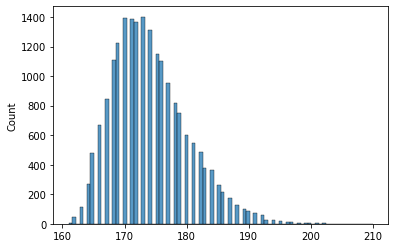

In [20]:
#Get worst fold , number of values
n_noise = 800
n_clean = 7200
monte_runs = 20000
k = 5
run_result = []
for r in range(monte_runs):  
    np.random.seed(r)
    samples = np.array([1]*n_noise + [0]*n_clean)
    np.random.shuffle(samples)
    #Split in k folds
    subsets = [samples[i*(len(samples)//k):(i+1)*(len(samples)//k)] for i in range(k)]
    get_noise_dist = [np.sum(subsets[i]) for i in range(k)]
    run_result.append(np.max(get_noise_dist))
print(np.mean(run_result),np.std(run_result))
sns.histplot(run_result)


In [ ]:
## Get number of runs
n_iter = 2000


## Theoretical Estimates

In [78]:
def calc_possibilities(t,n,a,b):
    sum = 0
    for k in range(n+1):
        if (n<k) or (t+n-1-a*n-k*(b-a+1)<(n-1)):
            term = 0
        else:
            term = ((-1)**k) * math.comb(n,k) * math.comb(t+n-1-a*n-k*(b-a+1),n-1)
        sum += term
    return sum

In [15]:
k = 2
a = 0
b = 800
((-1)**k) * math.comb(n,k) * math.comb(t+n-1-a*n-k*(b-a+1),n-1)

ValueError: n must be a non-negative integer

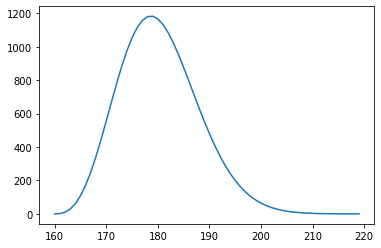

In [88]:
#number of noisy samples
t = 800
#number of folds
n = 5

#total combinations
total = calc_possibilities(800,5,0,800)

expect = 0
pdf = []
x_axis = []
for h in range(0,t-t//n+1):
    max_fold_samples = t//n + h
    b = t//n + h 
    a = 0
    term2 = math.comb(800,max_fold_samples)*math.comb(8000-800,1600-max_fold_samples)/math.comb(8000,1600)
    combs = calc_possibilities(t-max_fold_samples,n-1,0,b)
    pdf.append(combs*term2)
    # pdf.append(term2)
    x_axis.append(max_fold_samples)
plt.plot(x_axis[:60],pdf[:60])


In [2]:
import numpy as np
with open("/home/vishwesh/Projects/ReCoV/results/memory_auc_cindex_4.npy","rb") as file:
    data = np.load(file)

In [5]:
np.sort(data)

array([1.0759193 , 1.11327563, 1.13617569, 1.16173144, 1.1948341 ,
       1.21855556, 1.22650867, 1.24519147, 1.25384393, 1.25825351,
       1.25985881, 1.26071503, 1.27097049, 1.27432769, 1.28280407,
       1.28543037, 1.29327173, 1.30172012, 1.30458809, 1.30540187,
       1.31755226, 1.32390355, 1.32468798, 1.33431079, 1.35880036,
       1.35955346, 1.36417437, 1.36748204, 1.36876905, 1.370418  ,
       1.37472005, 1.37494856, 1.37931029, 1.38132624, 1.38265705,
       1.38392309, 1.38948862, 1.39024793, 1.40065148, 1.40134206,
       1.40211254, 1.40672888, 1.41002698, 1.4146405 , 1.41615554,
       1.41752847, 1.42183889, 1.42296573, 1.42933816, 1.43093596,
       1.43176241, 1.44006559, 1.44158291, 1.44525398, 1.44784153,
       1.44914095, 1.45101672, 1.45551229, 1.45750965, 1.45845107,
       1.46169499, 1.46704788, 1.46710338, 1.46735865, 1.47176124,
       1.47189169, 1.48435853, 1.48442235, 1.49124508, 1.49801775,
       1.49804085, 1.49851617, 1.50031384, 1.50076399, 1.50085

In [10]:
data[154]

1.2932717310824893

In [3]:
np.argsort(data)

array([316, 257,  40,  54,  72, 115, 193, 249, 269, 173, 241, 347,   8,
       195, 266,  58, 154, 378, 233, 119, 113,  10,  76,  16,  21, 180,
       287, 158, 317,  53, 365, 215, 187,  46,   4,   6,  12,  26, 271,
        34,  19, 299, 285,  13, 309, 303, 305, 208, 169, 174,  47, 336,
       330, 380, 352, 311, 294, 144, 149, 248, 321, 236, 369, 235,  73,
       151,   2, 200, 372, 131, 100, 103, 358, 245, 135, 356,  88, 270,
       239, 229, 324,  45, 225, 231,  95, 128,  62, 332, 368,  25,  11,
       338, 142, 163, 221, 228, 331,  80, 152,  79, 370, 383, 243, 222,
       226, 146, 273, 121, 333, 178,  14,  68, 300, 375,  92, 354,  84,
       310, 335, 201,  29, 357, 345,  50, 111,  97,  33, 373, 220, 141,
       267, 104, 129, 125,  42, 150, 258, 211, 278, 250, 109, 148, 281,
        44,  70, 325,  61, 283, 120,  91, 262, 382, 255, 242, 293, 268,
       194,  35, 176, 312, 175,  20, 346, 387, 140, 315, 253,  69, 295,
       374, 289,  55, 153, 167,  31, 127, 198, 147, 191,  28, 29

In [100]:
data[174]

1.8035272860126235

In [102]:
np.argsort(data)    

array([324,  72,  12, 345, 135, 316, 208,  40,  10, 149,  58,   6, 257,
       173, 270,  16,  34, 194, 249,  54, 187, 169,  24, 215,  76,  11,
       246, 115, 180, 311, 330, 113,  49, 347,   8, 233,  33, 136, 111,
       328, 294, 226, 127, 321,  53, 231, 201, 239, 300, 269,  47, 267,
       119,  13, 236,  46,  20,  26,  79, 339,  97, 255, 309, 296,  35,
       317, 319, 243, 352, 144,  67, 373, 133, 354, 326,   9, 302, 142,
       178,  23, 303, 299,  70, 150, 384,  19, 109, 229, 332, 385, 285,
       387, 358, 281,  96, 283,  84,  68, 293, 218, 174, 195, 148,  88,
       128,   2,  55, 241, 125,  82, 158, 262, 368,  63, 333, 202,  73,
       235, 141, 331, 346, 315, 301, 284, 153, 348, 124,  69,  21, 313,
        50, 386, 225, 356, 329, 151, 375,  15, 227, 129, 120, 252, 273,
       378,  25, 170, 336,   3, 245, 132,  92, 102, 305, 362, 287,  45,
       193,  14, 376, 146, 188, 154, 364, 190, 264, 374, 343,  80, 310,
       198, 121, 272, 167, 147,   5, 359, 204,  28, 116,  83, 16

In [93]:
data_orig = data.copy()

In [80]:
term2

0.03714870533679382

In [81]:
combs

1

In [73]:
x_axis[np.argmax(pdf)]

179

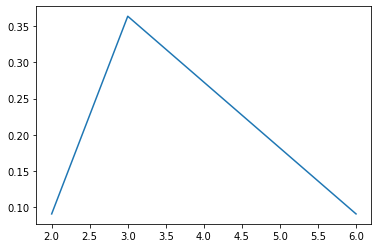

In [58]:
#number of noisy samples
t = 6
#number of folds
n = 3

#total combinations
total = calc_possibilities(t,n,0,t)

expect = 0
pdf = []
x_axis = []
for h in range(0,t-t//n+1):
    max_fold_samples = t//n + h
    b = t//n + h
    a = 0
    combs = calc_possibilities(t-max_fold_samples,n-1,0,b)
    pdf.append(combs)
    x_axis.append(max_fold_samples)
plt.plot(x_axis,pdf/np.sum(pdf))

In [61]:
total

28

In [63]:
101/28

3.607142857142857

In [49]:
pdf

[1, 4, 3, 2, 1]

In [59]:
np.sum([pdf[i]*x_axis[i]/np.sum(pdf) for i in range(len(pdf))])

3.818181818181818

In [34]:
calc_possibilities(10,2,0,10)

11

In [70]:
expectation = np.sum([pdf[i]*x_axis[i]/np.sum(pdf) for i in range(len(pdf))])

In [76]:
np.sqrt(np.sum([pdf[i]*((x_axis[i]-expectation)**2)/np.sum(pdf) for i in range(len(pdf))]))

7.583150019957587

In [71]:
expectation

180.34515560368985

In [29]:
expectation

73.32302430734661

In [21]:
t-t/n+1

641.0

In [19]:
calc_possibilities(20,4,0,10)

891

In [3]:
import sys
from pathlib import Path

import random
import csv
import os
import argparse
import pickle

import numpy as np
import pandas as pd
import wandb
import torch
import torch.utils.data as data_utils
import torch.optim as optim
from torch.autograd import Variable
from sklearn.model_selection import StratifiedKFold
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.metrics import roc_auc_score
import seaborn as sns
from matplotlib import pyplot as plt

from HECKTOR.model import  NegativeLogLikelihood, c_index, MIL_reg_Ins
from HECKTOR.dataloader import AMINNDataset, MultiFocalBags, MultiFocalRegBags
from HECKTOR.HECKTOR import train, test, set_seed, smallest_index, get_parser
from sample import sample_folds
from uncertainity import dropout_uncertainity


#Indices to remove
exclusion = []

# args = get_parser()
if True:
    torch.cuda.manual_seed(1234)
    print('\nGPU is ON!')

all_candidates = []
# For more information please check dataloader.py
data = AMINNDataset(data="hn")
features, labels = data.extract_dataset(subset="all", censor=730, feature_class='original', normalize=True)
dataset = MultiFocalRegBags(features,labels)


GPU is ON!


In [ ]:
import torch
trainset_1 = torch.utils.data.Subset(data, evens)

In [7]:
labels

,ID,mor,fu,dm,dmfu
156,1461,1,220,0,205
99,1260,0,730,0,2809
100,1260,0,730,0,2809
248,1838,0,730,0,2801
123,1339,1,88,0,81
...,...,...,...,...,...
121,1327,0,730,0,1318
192,1524,0,730,0,923
262,1879,0,730,0,1821
182,1501,0,730,0,1171


In [6]:
features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
156,-0.398782,-0.520131,2.535432,2.797235,2.725957,2.576690,2.567860,2.562464,3.574936,2.763834,...,-0.262075,-0.874024,-0.946580,-0.232993,-1.439772,2.646190,-1.131105,-0.009466,-1.199846,-0.928584
99,-2.942087,-2.330833,1.773023,4.569901,4.808285,4.521885,1.287701,4.486850,3.489824,1.392551,...,-0.385280,-0.788664,-0.843194,-0.301488,-1.170324,2.505749,-1.125230,0.091619,-0.794998,-0.932797
100,-3.291616,-2.755093,1.385093,5.219516,5.477763,5.367611,1.180391,5.361797,3.279117,1.235444,...,0.510892,0.263088,-1.182852,-0.751316,-0.814491,3.448106,-1.118301,-0.534204,-0.354763,-0.964597
248,1.235264,1.655113,2.808955,1.348548,1.250497,1.515759,2.436872,1.472706,2.949299,2.385612,...,0.115891,-0.495158,-0.777946,-0.419338,-1.208677,2.464151,-1.098583,-0.275512,-0.528016,-0.938888
123,0.478126,0.716690,2.536394,1.757524,1.841398,1.632956,2.296118,1.768143,2.859097,2.310627,...,-1.217833,-1.401991,0.434259,1.708357,-0.849198,-0.228239,-1.109390,2.365674,-0.865728,-0.039352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-0.419956,-1.727978,-1.810286,-1.189350,-1.630271,-1.275468,-1.035473,-1.197159,-1.111182,-1.316539,...,-1.274767,-0.653718,3.194829,2.371948,1.408580,-1.101150,1.984957,2.056094,3.279128,2.873172
192,-1.000375,-1.854113,-1.882082,-1.241142,-1.835517,-1.297125,-0.894376,-1.378357,-1.114035,-1.573369,...,-1.140950,-0.263468,1.925294,0.768508,2.484639,-1.065133,2.522588,0.179080,1.354041,1.736877
262,0.530275,0.687222,-1.484456,-1.848207,-1.604540,-1.711570,-1.821236,-1.804884,-1.115305,-1.620224,...,-0.775455,1.046789,1.325106,-0.426409,3.590648,-0.927571,2.933257,-0.628048,1.885076,0.906455
182,-0.930386,-0.498359,-1.581814,-1.532035,-1.412675,-1.526590,-1.958406,-1.596081,-1.119730,-1.761865,...,-0.950295,0.856242,1.295173,0.012377,2.173632,-1.031523,3.028985,-0.341722,2.138882,1.423244


In [10]:
dataset[1]

([array([-2.94208676, -2.33083326,  1.77302281,  4.56990069,  4.80828479,
          4.52188463,  1.28770109,  4.48684984,  3.4898236 ,  1.39255063,
         -1.99774266,  3.57830425, -1.72940997,  0.30760203,  0.88489241,
          3.52499004,  0.48570352, -0.02835896,  0.17261813,  0.69742583,
          0.60010636, -0.0235761 ,  0.70432873,  0.18840465,  0.366457  ,
         -0.05467878,  0.72097314,  0.61613902, -0.36921798, -0.08263185,
          0.094531  ,  0.21261974, -0.04348687,  0.13512142,  0.01303033,
         -0.28827472,  1.00452321, -0.28413221, -0.21815643, -0.24542662,
         -0.29944776,  0.35914315, -1.68287075,  0.99728785,  0.3505741 ,
          0.9429634 ,  0.34554258,  0.9579392 ,  0.21215512, -0.19376036,
          0.53050366, -0.03835709,  3.42587705, -0.46233653,  0.01903747,
          0.13138626,  2.82320236,  1.55841739,  0.41158858, -0.77826893,
          1.47123611,  3.84627624, -0.51360187, -0.56719261,  2.93333874,
         -0.59227191,  0.05921129, -0.